In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('/Users/miriamcorona/Desktop/D207_data/medical_clean.csv')


In [115]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# Get Info

In [116]:
df.tail()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942,8927.642,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690,28507.150,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481,15281.210,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483,7781.678,5,5,3,4,4,3,4,3
9999,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,...,7887.553,11643.190,4,3,3,2,3,6,4,3


In [117]:
df.shape #| Number of rows and columns



(10000, 50)

In [118]:
df.info() #| Index, Datatype and Memory information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [119]:
df.describe() #| Summary statistics for numerical columns


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [120]:
df.apply(pd.Series.value_counts) #| Unique values and counts for all columns

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
-174.2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-171.68815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-170.48517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-166.49262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-166.4926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff046fa1f4748db35a31b39148fb910,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff32d320943c79c32d39b658fb5c79b,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff39bdf-76c5-4155-ab94-f8fae651ea0c,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff5d08766552dabde13659ce4a5d8cf,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [122]:
df.select_dtypes(include=['number'])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,57775,44.10354,-102.01590,271,3,43,29702.32,19.910430,5,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [123]:
df.select_dtypes(include=['object'])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,Urban,America/New_York,"Programmer, multimedia",Widowed,...,No,No,No,No,No,Yes,No,Yes,No,Intravenous
9996,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,Urban,America/New_York,"Restaurant manager, fast food",Widowed,...,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan
9997,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,Rural,America/Chicago,"Psychologist, occupational",Separated,...,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous
9998,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,Rural,America/Denver,Outdoor activities/education manager,Divorced,...,Yes,No,No,No,Yes,No,No,No,No,Blood Work


In [124]:
df['ReAdmis']

0        No
1        No
2        No
3        No
4        No
       ... 
9995     No
9996    Yes
9997    Yes
9998    Yes
9999    Yes
Name: ReAdmis, Length: 10000, dtype: object

In [125]:
df.groupby('ReAdmis').count()


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
ReAdmis,,,,,,,,,,,,,,,,,,,,,
No,6331,6331,6331,6331,6331,6331,6331,6331,6331,6331,...,6331,6331,6331,6331,6331,6331,6331,6331,6331,6331
Yes,3669,3669,3669,3669,3669,3669,3669,3669,3669,3669,...,3669,3669,3669,3669,3669,3669,3669,3669,3669,3669


In [126]:
# patients who are readmitted to the hospital within a month of release (the “ReAdmis”
# column)
# patient medical conditions (high blood pressure, stroke, obesity, arthritis, diabetes,
# patient information (service they received while hospitalized, days in hospital, type of
# initial admission, etc.)
# patient demographic information (gender, age, job, education level, etc.)

In [127]:
df.groupby('Initial_admin').describe()

CaseOrder                                          \
                          count         mean          std  min      25%   
Initial_admin                                                             
Elective Admission       2504.0  5024.041933  2902.918040  3.0  2515.00   
Emergency Admission      5060.0  4975.155929  2888.209569  1.0  2474.75   
Observation Admission    2436.0  5028.944992  2868.305440  6.0  2564.25   

                                                    Zip                ...  \
                          50%      75%      max   count          mean  ...   
Initial_admin                                                          ...   
Elective Admission     5101.0  7496.00   9998.0  2504.0  49662.596645  ...   
Emergency Admission    4942.5  7487.75   9999.0  5060.0  49983.324506  ...   
Observation Admission  5058.5  7542.25  10000.0  2436.0  51035.498768  ...   

                      Item7        Item8                                     \
                        75%  max   count      mean       std  min  25%  50%   
Initial_admin                                                                 
Elective Admission      4.0  7.0  2504.0  3.503195  1.047031  1.0  3.0  3.0   
Emergency Admission     4.0  7.0  5060.0  3.501186  1.035732  1.0  3.0  3.5   
Observation Admission   4.0  7.0  2436.0  3.534072  1.051092  1.0  3.0  4.0   

                                 
                       75%  max  
Initial_admin                    
Elective Admission     4.0  7.0  
Emergency Admission    4.0  7.0  
Observation Admission  4.0  7.0  

[3 rows x 184 columns]

In [128]:
df['Initial_admin'].unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [129]:
df.columns.tolist()


['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [130]:
conditions = ['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip','ReAdmis','Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges','Marital',
 'Gender',]

In [131]:
information = ['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip','Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges','Marital',
 'Gender','VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink','ReAdmis','Initial_admin']
demographic = ['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip','Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges','Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender','ReAdmis','Initial_admin']

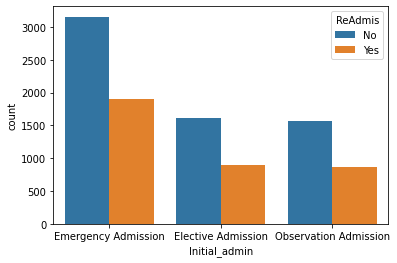

In [132]:
ax = sns.countplot(x="Initial_admin", hue="ReAdmis", data=df)


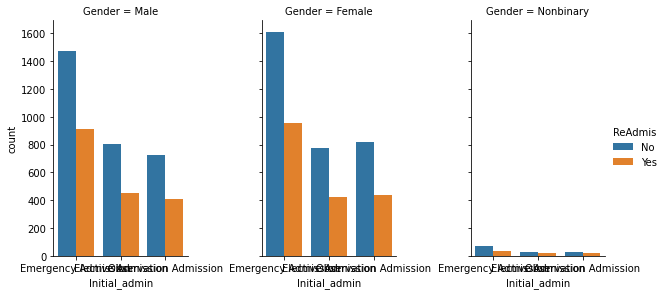

In [133]:
g = sns.catplot(x="Initial_admin", hue="ReAdmis", col="Gender",
                data=df, kind="count",
                height=4, aspect=.7);

In [134]:
df.pivot_table(index = 'ReAdmis',columns =  'Initial_admin')

#pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
#                    fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

Additional_charges                                            \
Initial_admin Elective Admission Emergency Admission Observation Admission   
ReAdmis                                                                      
No                  12726.357275        13090.276013          12560.407772   
Yes                 12955.263489        13273.554001          12664.522895   

                             Age                                            \
Initial_admin Elective Admission Emergency Admission Observation Admission   
ReAdmis                                                                      
No                     53.493781           53.345691             52.860881   
Yes                    54.890625           53.540966             53.835443   

                       CaseOrder                                            \
Initial_admin Elective Admission Emergency Admission Observation Admission   
ReAdmis                                                                      
No                   3633.222637         3444.158428           3679.957881   
Yes                  7520.065848         7512.880777           7461.468354   

                        Children  ...           TotalCharge  \
Initial_admin Elective Admission  ... Observation Admission   
ReAdmis                           ...                         
No                      2.006219  ...           3718.241000   
Yes                     2.216518  ...           7466.213516   

                     VitD_levels                                            \
Initial_admin Elective Admission Emergency Admission Observation Admission   
ReAdmis                                                                      
No                     17.861879           18.027562             17.916504   
Yes                    17.972776           18.004052             17.913975   

                             Zip                                            \
Initial_admin Elective Admission Emergency Admission Observation Admission   
ReAdmis                                                                      
No                  49341.419154        49780.780735          51066.707722   
Yes                 50238.995536        50319.053571          50979.222094   

                       vitD_supp                                            
Initial_admin Elective Admission Emergency Admission Observation Admission  
ReAdmis                                                                     
No                      0.426617            0.385615              0.375877  
Yes                     0.416295            0.418067              0.377445  

[2 rows x 69 columns]

In [135]:
#newdf = df[(df.ReAdmis == 'Yes')]

In [136]:
#newdf

In [137]:
# numcols= newdf[['Initial_days','TotalCharge','Additional_charges']]

In [138]:
# newdfini = newdf['Initial_days'].round(-1)

In [139]:
# newdfcharge = newdf[['TotalCharge','Additional_charges']].round(-2)

In [140]:
# newdf = newdf.round({'Initial_days': -1, 'TotalCharge': -2,'Additional_charges':-2})

In [141]:
# corr = newdf.corr()

In [142]:
# display(corr)

In [143]:
# fig, ax = plt.subplots(figsize=(15,15))  
# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap='RdBu')

In [144]:
# newdf.info()

In [145]:
df.ReAdmis

0        No
1        No
2        No
3        No
4        No
       ... 
9995     No
9996    Yes
9997    Yes
9998    Yes
9999    Yes
Name: ReAdmis, Length: 10000, dtype: object

In [146]:
# dummies = pd.get_dummies(df.ReAdmis,prefix = 'ReAdmis',drop_first=True)

In [147]:
# df =  df.drop(columns = 'ReAdmis').merge(dummies,left_index=True,right_index=True)



In [148]:
corr = df.corr()

In [149]:
display(corr)

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,1.000000,0.013361,-0.009584,-0.015578,0.008746,0.014226,0.001622,-0.015451,-0.009987,-0.004856,...,0.821364,0.001971,-0.017419,-0.006881,-0.009152,-0.014291,-0.004005,-0.006463,0.004512,-0.015478
Zip,0.013361,1.000000,-0.029327,-0.900683,0.030955,0.011065,-0.005960,0.009404,-0.003151,0.000838,...,0.012904,0.003490,-0.005756,-0.002297,-0.009235,-0.001498,0.004776,0.001881,-0.004036,-0.013274
Lat,-0.009584,-0.029327,1.000000,-0.112348,-0.207572,0.006373,-0.007270,-0.019369,0.001493,0.008380,...,-0.010759,-0.002283,0.008614,0.007413,0.014326,-0.015594,-0.001424,0.010723,0.009641,0.001733
Lng,-0.015578,-0.900683,-0.112348,1.000000,-0.031979,-0.014114,0.007493,-0.006665,-0.006389,0.000754,...,-0.008830,0.000079,0.004805,-0.002523,-0.000800,0.003508,-0.003296,-0.007443,0.001077,0.009253
Population,0.008746,0.030955,-0.207572,-0.031979,1.000000,0.002462,-0.018987,0.005426,0.002651,0.012646,...,0.019188,-0.004820,0.014312,0.023612,-0.001248,-0.004660,0.008705,0.008159,0.010034,-0.000220
Children,0.014226,0.011065,0.006373,-0.014114,0.002462,1.000000,0.009836,0.007176,0.009487,-0.002292,...,0.024100,0.013548,0.002138,0.001674,-0.002094,0.000728,0.012564,-0.008546,0.004156,-0.019753
Age,0.001622,-0.005960,-0.007270,0.007493,-0.018987,0.009836,1.000000,-0.012228,0.010315,0.006898,...,0.016876,0.716854,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367
Income,-0.015451,0.009404,-0.019369,-0.006665,0.005426,0.007176,-0.012228,1.000000,-0.013115,0.013464,...,-0.014345,-0.009825,-0.003494,-0.008182,-0.003782,-0.004301,-0.010642,0.001021,-0.000502,0.021178
VitD_levels,-0.009987,-0.003151,0.001493,-0.006389,0.002651,0.009487,0.010315,-0.013115,1.000000,0.010210,...,-0.001403,0.008290,0.013711,0.003979,-0.012103,-0.009872,0.006605,0.006887,-0.009832,-0.021074
Doc_visits,-0.004856,0.000838,0.008380,0.000754,0.012646,-0.002292,0.006898,0.013464,0.010210,1.000000,...,-0.005043,0.008072,0.003680,0.006024,-0.002718,-0.006538,-0.009434,0.012530,0.008589,0.004571


<AxesSubplot:>

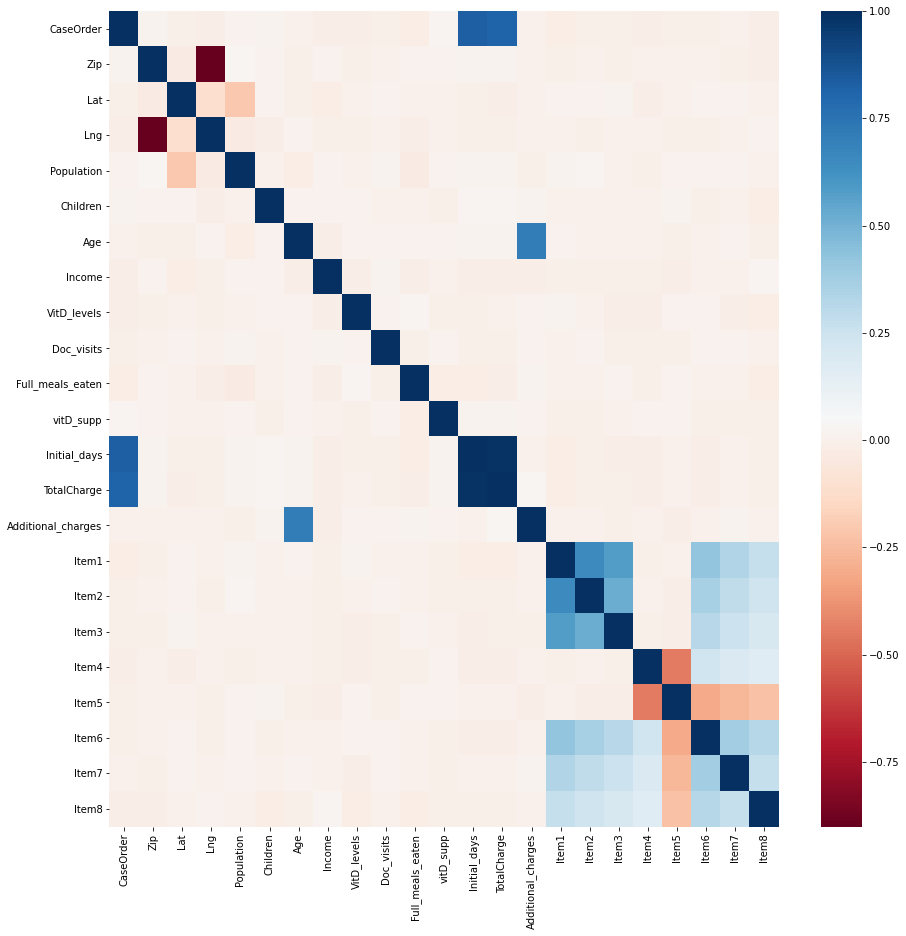

In [150]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap='RdBu')

In [151]:

# dummies = pd.get_dummies(df.Soft_drink,prefix = 'soft_drink',drop_first=True)
# df =  df.drop(columns = 'ReAdmis').merge(dummies,left_index=True,right_index=True)

In [152]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [153]:
# dummies1 = pd.get_dummies(df.Gender,prefix = 'Gender',drop_first=True)
# dummies2 = pd.get_dummies(df.Initial_admin,prefix = 'Initial_admin',drop_first=True)
# dummies3 = pd.get_dummies(df.HighBlood,prefix = 'HighBlood',drop_first=True)
# dummies4 = pd.get_dummies(df.Stroke,prefix = 'Stroke',drop_first=True)
# dummies5 = pd.get_dummies(df.Complication_risk,prefix = 'Complication_risk',drop_first=True)
# dummies6 = pd.get_dummies(df.Overweight,prefix = 'Overweight',drop_first=True)
# dummies7 = pd.get_dummies(df.Arthritis,prefix = 'Arthritis',drop_first=True)
# dummies8 = pd.get_dummies(df.Diabetes,prefix = 'Diabetes',drop_first=True)
# dummies9 = pd.get_dummies(df.Hyperlipidemia,prefix = 'Hyperlipidemia',drop_first=True)
# dummies10 = pd.get_dummies(df.BackPain,prefix = 'BackPain',drop_first=True)
# dummies11 = pd.get_dummies(df.Anxiety,prefix = 'Anxiety',drop_first=True)
# dummies12 = pd.get_dummies(df.Allergic_rhinitis,prefix = 'Allergic_rhinitis',drop_first=True)
# dummies13 = pd.get_dummies(df.Reflux_esophagitis,prefix = 'Reflux_esophagitis',drop_first=True)
# dummies14 = pd.get_dummies(df.Asthma,prefix = 'Asthma',drop_first=True)
# dummies15 = pd.get_dummies(df.Services,prefix = 'Services',drop_first=True)

# df =  df.drop(columns = 'Gender').merge(dummies1,left_index=True,right_index=True)
# df =  df.drop(columns = 'Initial_admin').merge(dummies2,left_index=True,right_index=True)
# df =  df.drop(columns = 'HighBlood').merge(dummies3,left_index=True,right_index=True)
# df =  df.drop(columns = 'Stroke').merge(dummies4,left_index=True,right_index=True)
# df =  df.drop(columns = 'Complication_risk').merge(dummies5,left_index=True,right_index=True)
# df =  df.drop(columns = 'Overweight').merge(dummies6,left_index=True,right_index=True)
# df =  df.drop(columns = 'Arthritis').merge(dummies7,left_index=True,right_index=True)
# df =  df.drop(columns = 'Diabetes').merge(dummies8,left_index=True,right_index=True)
# df =  df.drop(columns = 'Hyperlipidemia').merge(dummies9,left_index=True,right_index=True)
# df =  df.drop(columns = 'BackPain').merge(dummies10,left_index=True,right_index=True)
# df =  df.drop(columns = 'Anxiety').merge(dummies11,left_index=True,right_index=True)
# df =  df.drop(columns = 'Allergic_rhinitis').merge(dummies12,left_index=True,right_index=True)
# df =  df.drop(columns = 'Reflux_esophagitis').merge(dummies13,left_index=True,right_index=True)
# df =  df.drop(columns = 'Asthma').merge(dummies14,left_index=True,right_index=True)
# df =  df.drop(columns = 'Services').merge(dummies15,left_index=True,right_index=True)

In [154]:
# df.info()
# df = df.round({'Initial_days': -1, 'TotalCharge': -2,'Additional_charges':-2})

<AxesSubplot:>

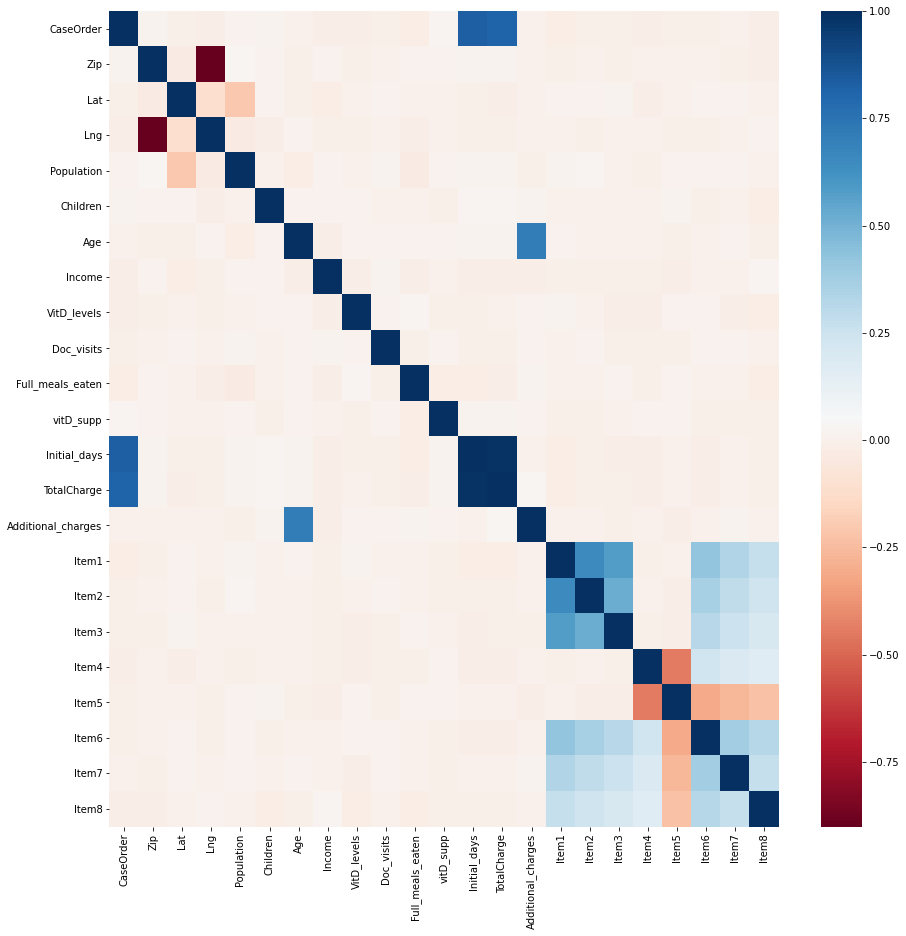

In [155]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap='RdBu')

In [156]:
abs(df.corr())['TotalCharge']


CaseOrder             0.821364
Zip                   0.012904
Lat                   0.010759
Lng                   0.008830
Population            0.019188
Children              0.024100
Age                   0.016876
Income                0.014345
VitD_levels           0.001403
Doc_visits            0.005043
Full_meals_eaten      0.014306
vitD_supp             0.016924
Initial_days          0.987640
TotalCharge           1.000000
Additional_charges    0.029256
Item1                 0.019706
Item2                 0.006055
Item3                 0.009051
Item4                 0.010318
Item5                 0.003532
Item6                 0.010480
Item7                 0.004556
Item8                 0.008250
Name: TotalCharge, dtype: float64

In [157]:
# df.rename(columns={"Yes": "Readmin_Y"})

In [158]:
df.columns.tolist()

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [159]:
df.TotalCharge

0       3726.702860
1       4193.190458
2       2434.234222
3       2127.830423
4       2113.073274
           ...     
9995    6850.942000
9996    7741.690000
9997    8276.481000
9998    7644.483000
9999    7887.553000
Name: TotalCharge, Length: 10000, dtype: float64

In [160]:
# df = df.drop(columns=['UID',
#  'City',
#  'State',
#  'County',
#  'Zip',
#  'Lat',
#  'Lng',
#  'Population',
#  'Area',
#  'TimeZone',
#  'Job',
#  'Children',
#  'Age',
#  'Income',
#  'Marital','Soft_drink',])

In [161]:
# new_df = df.drop(columns=['UID',
#  'City',
#  'State',
#  'County',
#  'Zip',
#  'Lat',
#  'Lng',
#  'Population',
#  'Area',
#  'TimeZone',
#  'Job',
#  'Children',
#  'Age',
#  'Income',
#  'Marital','Soft_drink','ReAdmis_Yes',
#  'Gender_Male',
#  'Gender_Nonbinary',
#  'Initial_admin_Emergency Admission',
#  'Initial_admin_Observation Admission',
#  'HighBlood_Yes',
#  'Stroke_Yes',
#  'Complication_risk_Low',
#  'Complication_risk_Medium',
#  'Overweight_Yes',
#  'Arthritis_Yes',
#  'Diabetes_Yes',
#  'Hyperlipidemia_Yes',
#  'BackPain_Yes',
#  'Anxiety_Yes',
#  'Allergic_rhinitis_Yes',
#  'Reflux_esophagitis_Yes',
#  'Asthma_Yes',
#  'Services_CT Scan',
#  'Services_Intravenous',
#  'Services_MRI','Customer_id',
#  'Interaction'])

new_df = df

In [162]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<AxesSubplot:>

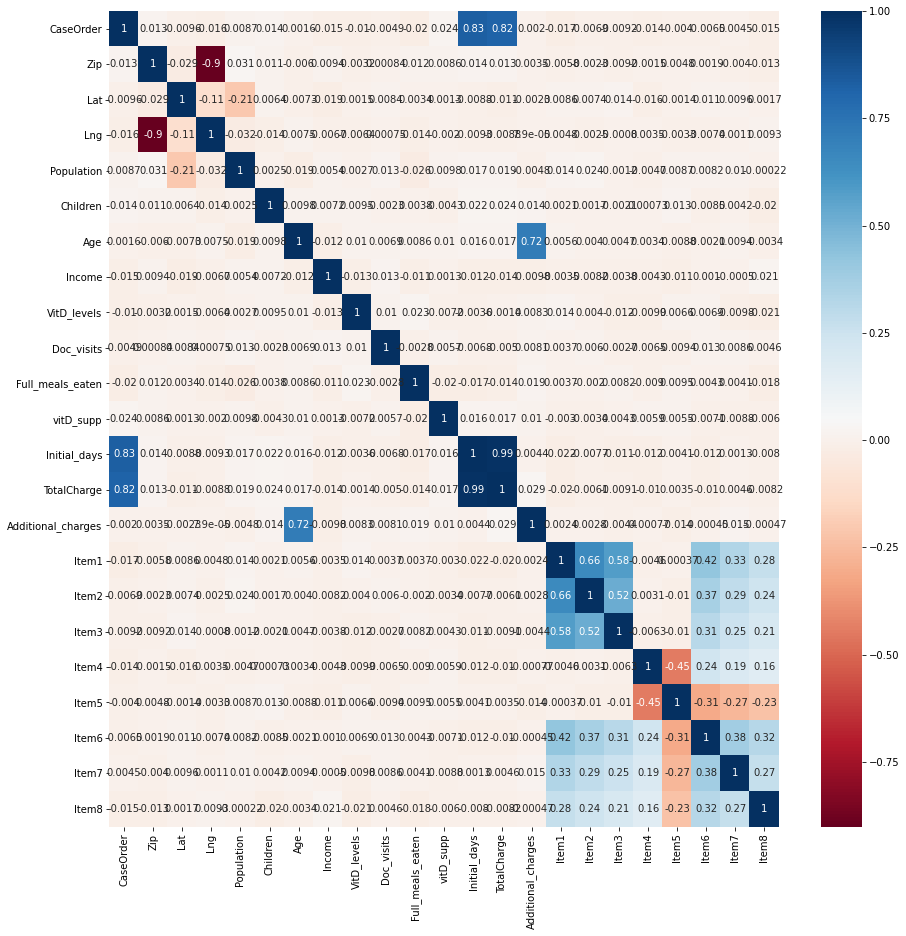

In [163]:
corr1 = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr1, xticklabels = corr1.columns, yticklabels = corr1.columns, cmap='RdBu', annot=True)

In [164]:
abs(new_df.corr())['TotalCharge']
new_df.columns.tolist()

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# the independent variables set 
X = new_df[['VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']] 

X = add_constant(X)
  
# pd.Series([variance_inflation_factor(X.values, i) 
#                for i in range(X.shape[1])], 
#               index=X.columns)

In [174]:
X

,const,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1.0,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,1.0,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,1.0,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,1.0,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1.0,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,16.980860,4,2,1,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,1.0,18.177020,5,0,0,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,1.0,17.129070,4,2,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,1.0,19.910430,5,2,1,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [175]:
series = pd.Series([variance_inflation_factor(X.values,i)
                   for i in range(X.shape[1])], index=X.columns)

In [176]:
print('VIF Info')
print('-'*100)
display(series)

VIF Info
----------------------------------------------------------------------------------------------------


const                 233.384365
VitD_levels             1.002548
Doc_visits              1.000805
Full_meals_eaten        1.002523
vitD_supp               1.001193
Initial_days           41.776423
TotalCharge            41.804762
Additional_charges      1.026904
Item1                   2.211024
Item2                   1.891209
Item3                   1.603968
Item4                   1.282260
Item5                   1.404810
Item6                   1.503425
Item7                   1.306299
Item8                   1.205484
dtype: float64

In [180]:
new_df2 = X
new_df2

,const,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1.0,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,1.0,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,1.0,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,1.0,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1.0,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,16.980860,4,2,1,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,1.0,18.177020,5,0,0,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,1.0,17.129070,4,2,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,1.0,19.910430,5,2,1,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [181]:
X2 = new_df2
series2 = pd.Series([variance_inflation_factor(X2.values,i)
                   for i in range(X2.shape[1])], index=X2.columns)
print('VIF Info')
print('-'*100)
display(series2)

VIF Info
----------------------------------------------------------------------------------------------------


const                 233.384365
VitD_levels             1.002548
Doc_visits              1.000805
Full_meals_eaten        1.002523
vitD_supp               1.001193
Initial_days           41.776423
TotalCharge            41.804762
Additional_charges      1.026904
Item1                   2.211024
Item2                   1.891209
Item3                   1.603968
Item4                   1.282260
Item5                   1.404810
Item6                   1.503425
Item7                   1.306299
Item8                   1.205484
dtype: float64

In [182]:
desc_new_df2 = new_df2.describe()

In [183]:
desc_new_df2.loc['+3_std'] = desc_new_df2.loc['mean'] + (desc_new_df2.loc['std'] * 3)
desc_new_df2.loc['-3_std'] = desc_new_df2.loc['mean'] - (desc_new_df2.loc['std'] * 3)

desc_new_df2

,const,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,0.0,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.0,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,1.0,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,1.0,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000
+3_std,1.0,24.015955,8.149403,4.025751,2.284414,113.383323,11853.354282,32562.333218,6.614697,6.611174,6.609366,6.623945,6.587477,6.619628,6.558215,6.636636
-3_std,1.0,11.912569,1.874997,-2.022951,-1.486614,-44.472725,-1229.008745,-6693.276044,0.422903,0.402226,0.412834,0.406255,0.406323,0.425372,0.429785,0.382764


In [184]:
new_df2.sort_values(by=['VitD_levels'])


,const,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
8140,1.0,9.806483,4,4,2,64.543480,7203.919000,14447.20000,4,3,4,5,2,5,4,4
3288,1.0,10.315234,4,1,0,5.201742,3478.111268,14641.57104,3,3,4,5,3,4,3,3
1315,1.0,10.877427,5,0,0,4.579654,2901.576420,18132.78168,3,3,3,5,1,3,4,5
5258,1.0,11.083430,5,0,0,47.087560,5859.666000,11371.93000,5,5,5,5,2,5,6,4
635,1.0,11.475314,5,0,1,13.062027,3338.649112,25614.36750,3,4,2,2,5,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7909,1.0,24.637420,3,1,0,59.548190,7420.164000,20709.84000,4,4,3,4,3,4,5,5
8251,1.0,24.889110,5,1,0,65.238270,7433.753000,26402.19000,2,3,4,5,4,3,2,5
6829,1.0,25.147270,4,0,0,36.412770,5252.764000,7793.23000,3,2,1,4,4,5,3,4
4185,1.0,25.444099,6,0,0,10.623286,3018.562613,23136.37565,3,3,4,4,3,3,4,2


In [185]:
xtar = df[['VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Additional_charges']]
xtar.astype(float)

,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Additional_charges
0,19.141466,6.0,0.0,0.0,17939.403420
1,18.940352,4.0,2.0,1.0,17612.998120
2,18.057507,4.0,1.0,0.0,17505.192460
3,16.576858,4.0,1.0,0.0,12993.437350
4,17.439069,5.0,0.0,2.0,3716.525786
...,...,...,...,...,...
9995,16.980860,4.0,2.0,1.0,8927.642000
9996,18.177020,5.0,0.0,0.0,28507.150000
9997,17.129070,4.0,2.0,0.0,15281.210000
9998,19.910430,5.0,2.0,1.0,7781.678000


In [186]:
xtar_cons = sm.add_constant(xtar)

In [187]:
pd.DataFrame(xtar_cons)

,const,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Additional_charges
0,1.0,19.141466,6,0,0,17939.403420
1,1.0,18.940352,4,2,1,17612.998120
2,1.0,18.057507,4,1,0,17505.192460
3,1.0,16.576858,4,1,0,12993.437350
4,1.0,17.439069,5,0,2,3716.525786
...,...,...,...,...,...,...
9995,1.0,16.980860,4,2,1,8927.642000
9996,1.0,18.177020,5,0,0,28507.150000
9997,1.0,17.129070,4,2,0,15281.210000
9998,1.0,19.910430,5,2,1,7781.678000


In [188]:
ytar = df[['TotalCharge']]

In [189]:
ytar = ytar.values


In [190]:
ytar

array([[3726.70286 ],
       [4193.190458],
       [2434.234222],
       ...,
       [8276.481   ],
       [7644.483   ],
       [7887.553   ]])

In [191]:
model = sm.OLS(ytar, xtar_cons)

In [192]:
lr = model.fit()

In [193]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.750
Date:                Thu, 18 Feb 2021   Prob (F-statistic):             0.0173
Time:                        21:24:07   Log-Likelihood:                -91055.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9994   BIC:                         1.822e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5272.7372    225.383     23.395      0.000    4830.941    5714.533
VitD_levels           -1.2289     10.809     -0.114      0.909     -22.416      19.958
Doc_visits           -11.2633     20.844     -0.540      0.589     -52.123      29.596
Full_meals_eaten     -31.4038     21.634     -1.452      0.147     -73.811      11.003
vitD_supp             56.7303     34.689      1.635      0.102     -11.266     124.727
Additional_charges     0.0098      0.003      2.942      0.003       0.003       0.016
==============================================================================
Omnibus:                    45149.073   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.643
Skew:                           0.069   Prob(JB):                    4.64e-254
Kurtosis:                       1.332   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
form_lr = smf.ols(formula='ytar ~ VitD_levels+Doc_visits+Full_meals_eaten+vitD_supp+Initial_days+Additional_charges', data=df)


In [198]:
mlr = form_lr.fit()

In [199]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ytar   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 6.792e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:25:17   Log-Likelihood:                -72399.
No. Observations:               10000   AIC:                         1.448e+05
Df Residuals:                    9993   BIC:                         1.449e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2326.8337     35.199     66.106      0.000    2257.837    2395.830
VitD_levels            2.0833      1.673      1.245      0.213      -1.197       5.364
Doc_visits             2.9360      3.227      0.910      0.363      -3.390       9.262
Full_meals_eaten       4.8856      3.350      1.458      0.145      -1.681      11.452
vitD_supp              3.2715      5.371      0.609      0.542      -7.257      13.800
Initial_days          81.8452      0.128    637.921      0.000      81.594      82.097
Additional_charges     0.0083      0.001     16.034      0.000       0.007       0.009
==============================================================================
Omnibus:                      901.730   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.764
Skew:                           0.149   Prob(JB):                     2.44e-67
Kurtosis:                       2.195   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""